In [61]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import pickle
from ultralytics import SAM



In [67]:
image = Image.open('./dataset/original/test1.jpg')
image = np.array(image.convert("RGB"))

In [69]:
model = SAM("sam2.1_b.pt")
masks = model("./dataset/original/test1.jpg")


image 1/1 /home/leonardo/Seruso_dataset/dataset/original/test1.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 188351.1ms
Speed: 6.7ms preprocess, 188351.1ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
masks[0].masks.data[0].cpu().numpy()


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(251, 352))

In [80]:
# change the parent directory path where the SAM masks will be saved
par_dir_SAM_masks = "dataset"
dir_SAM_masks = os.path.join(par_dir_SAM_masks, "SAM_masks")
if(not os.path.exists(dir_SAM_masks)):
    os.makedirs(dir_SAM_masks)

np.savez_compressed(os.path.join(dir_SAM_masks, "test1"), bool_array=masks[0].masks.data.cpu().numpy())
# saving process
if(not os.path.exists(os.path.join(dir_SAM_masks, "test1"))):
    os.makedirs(os.path.join(dir_SAM_masks, "test1"))
for index, mask in enumerate(masks[0].masks.data):
    tmp = Image.fromarray(mask.cpu().numpy())
    tmp.save(os.path.join(dir_SAM_masks, "test1", str(index)+'.png'))
    

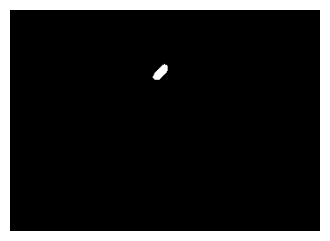

In [79]:
plt.figure(figsize=(4, 4))
plt.imshow(masks[0].masks.data[6].cpu().numpy(), cmap="grey")
plt.axis('off')
plt.show()

In [9]:
predictor = SAM2ImagePredictor.from_pretrained("facebook/sam2.1-hiera-tiny")

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(image)
    masks, _, _ = predictor.predict()

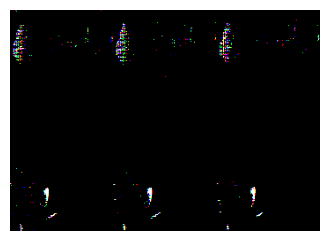

In [19]:
masks = masks.reshape([image.shape[0],image.shape[1],image.shape[2]])
plt.figure(figsize=(4, 4))
plt.imshow(masks)
plt.axis('off')
plt.show()